**Tableau URL**

https://public.tableau.com/views/PizzaSales_16668341874610/StatisticalAnalysis?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link

# Milestone 1

### `Huesca Rashad FTDS_016`

## Description

### Background

The management from PizzaGut was concerned about a recent report that stated that our close competitor earned a raise in revenue by 5% this year with GMV of 700.000 USD while on the other hand our sales seems to be on a downward trend this year. The management wanted some action to be taken to raise our revenues by 3% starting from next quarter, we need to determine how to achieve it for next quarter and beyond based on this year sales performance.

### SMART Success Criteria

#### Specific

● What: What do we want to accomplish?<br>
Increase our revenue.<br>

● When: When do we want to achieve this goal?<br>
Next quarter.<br>

● Why: Why do we want to achieve this goal?<br>
To ensure that we stay ahead against our competitor.

#### Measurable

● How much?<br>
3% increase of next quarter revenue.

● How will I know when it is accomplished?<br>
By comparing next quarter revenue with last quarter revenue.

#### Achievable

● How can I accomplish this goal?<br>
Determining some action to be taken next year about the best and worst selling pizza types and categories.

● Do I have the resources and capabilities to achieve the goal? If not, what am I missing?<br>
The goal could be eased by RnD by doing some innovation in pizza types or categories.

● Have others done it successfully before?<br>
Yes, we have done 3% increase in revenue in the past before.

#### Relevant

●Does this seem worthwhile?<br>
Of course, the pressure from our competitor is more alive than ever.

●Is this the right time?<br>
Yes, the sooner we set our goals the sooner we can prepare our strategies for next year.

#### Time-bound

●When?<br>
Next quarter.

●What can I do today?<br>
Review and analyze our sales performance this year.

●What can I do one month from now?<br>
Review and analyze our sales performance after we implemented the new strategies.


### Problem Statement

Increase our next quarter revenue by 3% complete with the method to reach the said goal for next quarter and beyond.

### Problem Description

- General<br>
How does our monthly revenue perform this year? And what will next quarter looks like in the current projection?

- Strength<br>
What is our best selling pizza types and how can we maximize the profit from it?<br>
What is our best selling month and how can we maximize the profit from it?

- Weakness<br>
What is our worst selling pizza types and how can we do better sales for it?<br>
Would it be better to scratch the worst selling pizza types from the menu?

- Opportunity<br>
If we want to create a new variant of pizza, what kind of pizza would be the best option?

- Threat<br>
How well is our daily sales compared against our competitors? 

## Working Area

### Importing Library

First we need to import all the library that we will use for this task.

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import numpy as np

### Importing Data

We are going to use a dataset from Kaggle, which is this data:

https://www.kaggle.com/datasets/mysarahmadbhat/pizza-place-sales?select=pizza_types.csv

Then, we make a query for the dataset in MySQL Workbench by using this code:

```
SELECT *
FROM orders a
JOIN order_details b
ON a.order_id = b.order_id
INNER JOIN pizzas c
ON b.pizza_id = c.pizza_id
INNER JOIN pizza_types d
ON c.pizza_type_id = d.pizza_type_id
ORDER BY order_details_id
```

And now we will load the data by using .read_csv from our directory.

In [88]:
df = pd.read_csv("pizzagut.csv")
df

,order_id,date,time,order_details_id,order_id.1,pizza_id,quantity,pizza_id.1,pizza_type_id,size,price,pizza_type_id.1,name,category,ingredients
0,1,2015-01-01,11:38:36,1,1,hawaiian_m,1,hawaiian_m,hawaiian,M,13.25,hawaiian,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,2015-01-01,11:57:40,2,2,classic_dlx_m,1,classic_dlx_m,classic_dlx,M,16.00,classic_dlx,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
2,2,2015-01-01,11:57:40,3,2,five_cheese_l,1,five_cheese_l,five_cheese,L,18.50,five_cheese,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
3,2,2015-01-01,11:57:40,4,2,ital_supr_l,1,ital_supr_l,ital_supr,L,20.75,ital_supr,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
4,2,2015-01-01,11:57:40,5,2,mexicana_m,1,mexicana_m,mexicana,M,16.00,mexicana,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48615,21348,2015-12-31,21:23:10,48616,21348,ckn_alfredo_m,1,ckn_alfredo_m,ckn_alfredo,M,16.75,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
48616,21348,2015-12-31,21:23:10,48617,21348,four_cheese_l,1,four_cheese_l,four_cheese,L,17.95,four_cheese,The Four Cheese Pizza,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo..."
48617,21348,2015-12-31,21:23:10,48618,21348,napolitana_s,1,napolitana_s,napolitana,S,12.00,napolitana,The Napolitana Pizza,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,..."
48618,21349,2015-12-31,22:09:54,48619,21349,mexicana_l,1,mexicana_l,mexicana,L,20.25,mexicana,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."


Let's take a look at the top and bottom list of our dataset with .head, and .tail.

In [89]:
df.head()

,order_id,date,time,order_details_id,order_id.1,pizza_id,quantity,pizza_id.1,pizza_type_id,size,price,pizza_type_id.1,name,category,ingredients
0,1,2015-01-01,11:38:36,1,1,hawaiian_m,1,hawaiian_m,hawaiian,M,13.25,hawaiian,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,2015-01-01,11:57:40,2,2,classic_dlx_m,1,classic_dlx_m,classic_dlx,M,16.00,classic_dlx,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
2,2,2015-01-01,11:57:40,3,2,five_cheese_l,1,five_cheese_l,five_cheese,L,18.50,five_cheese,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
3,2,2015-01-01,11:57:40,4,2,ital_supr_l,1,ital_supr_l,ital_supr,L,20.75,ital_supr,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
4,2,2015-01-01,11:57:40,5,2,mexicana_m,1,mexicana_m,mexicana,M,16.00,mexicana,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."


In [90]:
df.tail()

,order_id,date,time,order_details_id,order_id.1,pizza_id,quantity,pizza_id.1,pizza_type_id,size,price,pizza_type_id.1,name,category,ingredients
48615,21348,2015-12-31,21:23:10,48616,21348,ckn_alfredo_m,1,ckn_alfredo_m,ckn_alfredo,M,16.75,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
48616,21348,2015-12-31,21:23:10,48617,21348,four_cheese_l,1,four_cheese_l,four_cheese,L,17.95,four_cheese,The Four Cheese Pizza,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo..."
48617,21348,2015-12-31,21:23:10,48618,21348,napolitana_s,1,napolitana_s,napolitana,S,12.00,napolitana,The Napolitana Pizza,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,..."
48618,21349,2015-12-31,22:09:54,48619,21349,mexicana_l,1,mexicana_l,mexicana,L,20.25,mexicana,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."
48619,21350,2015-12-31,23:02:05,48620,21350,bbq_ckn_s,1,bbq_ckn_s,bbq_ckn,S,12.75,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."


### Data Cleaning


Before we analyze our data, we need to make sure that the data is ready, first we need to see if there's null valued data in our dataset.

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          48620 non-null  int64  
 1   date              48620 non-null  object 
 2   time              48620 non-null  object 
 3   order_details_id  48620 non-null  int64  
 4   order_id.1        48620 non-null  int64  
 5   pizza_id          48620 non-null  object 
 6   quantity          48620 non-null  int64  
 7   pizza_id.1        48620 non-null  object 
 8   pizza_type_id     48620 non-null  object 
 9   size              48620 non-null  object 
 10  price             48620 non-null  float64
 11  pizza_type_id.1   48620 non-null  object 
 12  name              48620 non-null  object 
 13  category          48620 non-null  object 
 14  ingredients       48620 non-null  object 
dtypes: float64(1), int64(4), object(10)
memory usage: 5.6+ MB


There seems to be no null valued data here, but the datatype for date and time is in object, we need to convert it as datetime with the code below.

In [92]:
df['date']= pd.to_datetime(df['date'])
df['time']= pd.to_datetime(df['time'], format='%H:%M:%S').dt.time
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          48620 non-null  int64         
 1   date              48620 non-null  datetime64[ns]
 2   time              48620 non-null  object        
 3   order_details_id  48620 non-null  int64         
 4   order_id.1        48620 non-null  int64         
 5   pizza_id          48620 non-null  object        
 6   quantity          48620 non-null  int64         
 7   pizza_id.1        48620 non-null  object        
 8   pizza_type_id     48620 non-null  object        
 9   size              48620 non-null  object        
 10  price             48620 non-null  float64       
 11  pizza_type_id.1   48620 non-null  object        
 12  name              48620 non-null  object        
 13  category          48620 non-null  object        
 14  ingredients       4862

Next thing is that we don't need all the column so we will drop some of them. We only need one id, so we will use order_id and drop the rest of them, and we don't need the ingredients column.

In [93]:
newdf = df.drop(df.columns[[0,4,5,7,8,11,14]],axis=1)
newdf

,date,time,order_details_id,quantity,size,price,name,category
0,2015-01-01,11:38:36,1,1,M,13.25,The Hawaiian Pizza,Classic
1,2015-01-01,11:57:40,2,1,M,16.00,The Classic Deluxe Pizza,Classic
2,2015-01-01,11:57:40,3,1,L,18.50,The Five Cheese Pizza,Veggie
3,2015-01-01,11:57:40,4,1,L,20.75,The Italian Supreme Pizza,Supreme
4,2015-01-01,11:57:40,5,1,M,16.00,The Mexicana Pizza,Veggie
...,...,...,...,...,...,...,...,...
48615,2015-12-31,21:23:10,48616,1,M,16.75,The Chicken Alfredo Pizza,Chicken
48616,2015-12-31,21:23:10,48617,1,L,17.95,The Four Cheese Pizza,Veggie
48617,2015-12-31,21:23:10,48618,1,S,12.00,The Napolitana Pizza,Classic
48618,2015-12-31,22:09:54,48619,1,L,20.25,The Mexicana Pizza,Veggie


### Data Exploration

#### Simple Exploration

Next, we can do some simple exploration on our dataset. Like the range of date date the data taken.

In [94]:
print("Data was taken between", newdf["date"].min(), "and", newdf["date"].max())

Data was taken between 2015-01-01 00:00:00 and 2015-12-31 00:00:00


We could also finds out what types of pizza do we have.

In [95]:
print(sorted(newdf.name.unique()))

['The Barbecue Chicken Pizza', 'The Big Meat Pizza', 'The Brie Carre Pizza', 'The Calabrese Pizza', 'The California Chicken Pizza', 'The Chicken Alfredo Pizza', 'The Chicken Pesto Pizza', 'The Classic Deluxe Pizza', 'The Five Cheese Pizza', 'The Four Cheese Pizza', 'The Greek Pizza', 'The Green Garden Pizza', 'The Hawaiian Pizza', 'The Italian Capocollo Pizza', 'The Italian Supreme Pizza', 'The Italian Vegetables Pizza', 'The Mediterranean Pizza', 'The Mexicana Pizza', 'The Napolitana Pizza', 'The Pepper Salami Pizza', 'The Pepperoni Pizza', 'The Pepperoni, Mushroom, and Peppers Pizza', 'The Prosciutto and Arugula Pizza', 'The Sicilian Pizza', 'The Soppressata Pizza', 'The Southwest Chicken Pizza', 'The Spicy Italian Pizza', 'The Spinach Pesto Pizza', 'The Spinach Supreme Pizza', 'The Spinach and Feta Pizza', 'The Thai Chicken Pizza', 'The Vegetables + Vegetables Pizza']


Now we can begin our analysis process for each problem description.

#### Description 1

- General<br>
How much did we increase our monthly revenue this year? And what will next quarter looks like in the current projection?

To answer this problem, we need to determine the GMV or Gross Merchandise Value which is the multiplication of the sale price with the number of the item sold for each item. So first we need to create a new column where GMV = price x quantity for each order so we could group it by the types later.

In [96]:
newdf['GMV'] = (newdf.price * newdf.quantity)
newdf

,date,time,order_details_id,quantity,size,price,name,category,GMV
0,2015-01-01,11:38:36,1,1,M,13.25,The Hawaiian Pizza,Classic,13.25
1,2015-01-01,11:57:40,2,1,M,16.00,The Classic Deluxe Pizza,Classic,16.00
2,2015-01-01,11:57:40,3,1,L,18.50,The Five Cheese Pizza,Veggie,18.50
3,2015-01-01,11:57:40,4,1,L,20.75,The Italian Supreme Pizza,Supreme,20.75
4,2015-01-01,11:57:40,5,1,M,16.00,The Mexicana Pizza,Veggie,16.00
...,...,...,...,...,...,...,...,...,...
48615,2015-12-31,21:23:10,48616,1,M,16.75,The Chicken Alfredo Pizza,Chicken,16.75
48616,2015-12-31,21:23:10,48617,1,L,17.95,The Four Cheese Pizza,Veggie,17.95
48617,2015-12-31,21:23:10,48618,1,S,12.00,The Napolitana Pizza,Classic,12.00
48618,2015-12-31,22:09:54,48619,1,L,20.25,The Mexicana Pizza,Veggie,20.25


Now we can group by our GMV to be monthly so we could see our revenue growth each month.

In [97]:
monthly = newdf.groupby(newdf.date.dt.month)['GMV'].sum()
monthly = monthly.to_frame()
monthly

,GMV
date,
1,69793.30
2,65159.60
3,70397.10
4,68736.80
5,71402.75
6,68230.20
7,72557.90
8,68278.25
9,64180.05


Next, we will find out how much gain or loss for each of the following months.

In [98]:
monthly['differences'] = monthly.GMV.diff()
monthly['percentage'] = monthly.differences / (monthly.GMV - monthly.differences) *100
monthly

,GMV,differences,percentage
date,,,
1,69793.30,NaN,NaN
2,65159.60,-4633.70,-6.639
3,70397.10,5237.50,8.038
4,68736.80,-1660.30,-2.358
5,71402.75,2665.95,3.878
6,68230.20,-3172.55,-4.443
7,72557.90,4327.70,6.343
8,68278.25,-4279.65,-5.898
9,64180.05,-4098.20,-6.002


We can see that there's been a mix of gain and loss of our monthly revenue this year. Let's if if it's trending upward or downward with visualization.

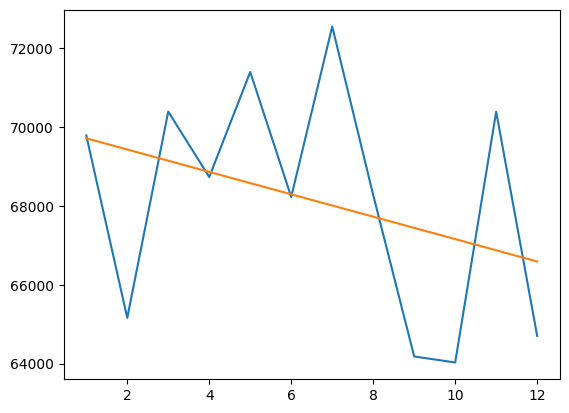

In [99]:
# Change the dataset to array
array = np.array(monthly)
x = range(1,13)
y = array[:,0]

# Calculate the trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

# Plot the data
plt.plot(x, y)
plt.plot(x, p(x))

With the visualization, it is clear that the trend of our sales is going down. How about next year projection based on this trend? First we need to create a moving average for our forecast, we will use 3 months as our moving average.

In [100]:
monthly['percentage_diff'] = monthly.percentage.diff()
monthly['movingAVG'] = monthly['percentage'].rolling(3).mean()
pd.set_option("display.precision", 3)
monthly

,GMV,differences,percentage,percentage_diff,movingAVG
date,,,,,
1,69793.30,NaN,NaN,NaN,NaN
2,65159.60,-4633.70,-6.639,NaN,NaN
3,70397.10,5237.50,8.038,14.677,NaN
4,68736.80,-1660.30,-2.358,-10.396,-0.320
5,71402.75,2665.95,3.878,6.237,3.186
6,68230.20,-3172.55,-4.443,-8.322,-0.974
7,72557.90,4327.70,6.343,10.786,1.926
8,68278.25,-4279.65,-5.898,-12.241,-1.333
9,64180.05,-4098.20,-6.002,-0.104,-1.853


Now that we got our moving average for this year, we can forecast next quarter GMV using this data.

In [101]:
# Define loop function to add our new rows
def calc_new_val(old_row):
    new_row = pd.Series()
    new_row['GMV'] = old_row['GMV'] + (old_row['GMV'] * old_row['movingAVG'] / 100)
    new_row['differences'] = new_row['GMV'] - old_row['GMV']
    new_row['percentage'] = new_row['differences'] / old_row['GMV'] * 100
    new_row['percentage_diff'] = new_row['percentage'] - old_row['percentage']
    new_row['movingAVG'] = (old_row['percentage'] - old_row['percentage_diff'] + old_row['percentage'] + new_row['percentage']) / 3
    return new_row

# Call the function for row 13 to 24 which is next year's month
for i in range(13, 16):
    monthly.loc[i, :] = calc_new_val(monthly.loc[i-1, :])

monthly

C:\Users\USER\AppData\Local\Temp\ipykernel_8420\626386650.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_row = pd.Series()
C:\Users\USER\AppData\Local\Temp\ipykernel_8420\626386650.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_row = pd.Series()
C:\Users\USER\AppData\Local\Temp\ipykernel_8420\626386650.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_row = pd.Series()


,GMV,differences,percentage,percentage_diff,movingAVG
date,,,,,
1,69793.300,NaN,NaN,NaN,NaN
2,65159.600,-4633.700,-6.639,NaN,NaN
3,70397.100,5237.500,8.038,14.677,NaN
4,68736.800,-1660.300,-2.358,-10.396,-0.320
5,71402.750,2665.950,3.878,6.237,3.186
6,68230.200,-3172.550,-4.443,-8.322,-0.974
7,72557.900,4327.700,6.343,10.786,1.926
8,68278.250,-4279.650,-5.898,-12.241,-1.333
9,64180.050,-4098.200,-6.002,-0.104,-1.853


It seems that next quarter sales will also have some mix trend, let's visualize it to have better understanding of the trend.

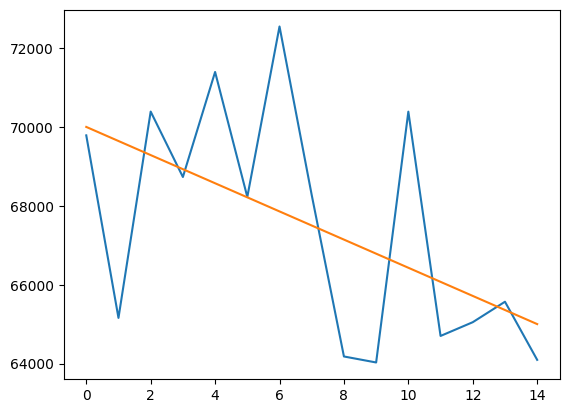

In [102]:
# Change the dataset to array
array = np.array(monthly)
x = range(0,15)
y = array[:,0]

# Calculate the trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

# Plot the data
plt.plot(x, y)
plt.plot(x, p(x))

It's clear that the trend for next quarter will still be going down.

#### Description 2

- Strength<br>
What is our best selling pizza types and how can we maximize the profit from it?

We will determine the best selling pizza based on the number of quantity for each pizza sold with group by the pizzas types.

In [103]:
top = newdf.groupby('name')['quantity'].sum()
top = top.sort_values(ascending=False)
top


name
The Classic Deluxe Pizza                      2453
The Barbecue Chicken Pizza                    2432
The Hawaiian Pizza                            2422
The Pepperoni Pizza                           2418
The Thai Chicken Pizza                        2371
The California Chicken Pizza                  2370
The Sicilian Pizza                            1938
The Spicy Italian Pizza                       1924
The Southwest Chicken Pizza                   1917
The Big Meat Pizza                            1914
The Four Cheese Pizza                         1902
The Italian Supreme Pizza                     1884
The Vegetables + Vegetables Pizza             1526
The Mexicana Pizza                            1484
The Napolitana Pizza                          1464
The Prosciutto and Arugula Pizza              1457
The Spinach and Feta Pizza                    1446
The Pepper Salami Pizza                       1446
The Italian Capocollo Pizza                   1438
The Greek Pizza           

We can see best selling pizza more clearly with head and visualize it.

<AxesSubplot: xlabel='name'>

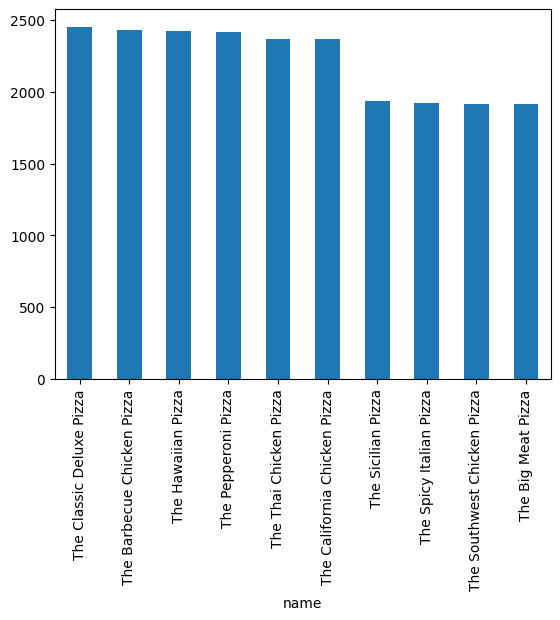

In [104]:
top10 = top.head(10)
top10.plot(kind='bar')

From here we can see that the classic deluxe pizza is the best selling pizza and the barbecue chicken pizza, the hawaiian pizza, and the pepperoni pizza is the closest from it. But what do we have to do to maximize our profit from these types of pizza? We could get a big gain in revenue by just improving their price by a little bit, for example:

In [105]:
newprice = newdf[newdf['name'] == 'The Classic Deluxe Pizza']
newprice['new'] = newprice.price + 0.25
newprice['newGMV'] = newprice.quantity * newprice.new
newprice

C:\Users\USER\AppData\Local\Temp\ipykernel_8420\963474831.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newprice['new'] = newprice.price + 0.25
C:\Users\USER\AppData\Local\Temp\ipykernel_8420\963474831.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newprice['newGMV'] = newprice.quantity * newprice.new


,date,time,order_details_id,quantity,size,price,name,category,GMV,new,newGMV
1,2015-01-01,11:57:40,2,1,M,16.0,The Classic Deluxe Pizza,Classic,16.0,16.25,16.25
14,2015-01-01,12:52:01,15,1,S,12.0,The Classic Deluxe Pizza,Classic,12.0,12.25,12.25
68,2015-01-01,14:54:26,69,1,S,12.0,The Classic Deluxe Pizza,Classic,12.0,12.25,12.25
71,2015-01-01,15:11:17,72,1,M,16.0,The Classic Deluxe Pizza,Classic,16.0,16.25,16.25
90,2015-01-01,16:54:09,91,1,M,16.0,The Classic Deluxe Pizza,Classic,16.0,16.25,16.25
...,...,...,...,...,...,...,...,...,...,...,...
48480,2015-12-31,13:34:19,48481,1,S,12.0,The Classic Deluxe Pizza,Classic,12.0,12.25,12.25
48487,2015-12-31,14:52:25,48488,1,L,20.5,The Classic Deluxe Pizza,Classic,20.5,20.75,20.75
48508,2015-12-31,16:01:07,48509,1,M,16.0,The Classic Deluxe Pizza,Classic,16.0,16.25,16.25
48599,2015-12-31,20:27:23,48600,1,M,16.0,The Classic Deluxe Pizza,Classic,16.0,16.25,16.25


In [106]:
oldprice = newdf[newdf['name'] == 'The Classic Deluxe Pizza']
oldprice = oldprice.GMV.sum()
newprice = newprice.newGMV.sum()
p = (newprice-oldprice) / oldprice *100
print('Our original GMV was', oldprice, 'USD, and the new GMV is', newprice, 'USD which raised by', p, '%')


Our original GMV was 38180.5 USD, and the new GMV is 38793.75 USD which raised by 1.6061864040544258 %


#### Description 3

- Strength<br>
What is our best selling month and how can we maximize the profit from it?

We will determine the best selling month based on the number of quantity for each pizza sold with group by month.

In [107]:
topmonth = monthly = newdf.groupby(newdf.date.dt.month)['quantity'].sum()
topmonth

date
1     4232
2     3961
3     4261
4     4151
5     4328
6     4107
7     4392
8     4168
9     3890
10    3883
11    4266
12    3935
Name: quantity, dtype: int64

We can see best selling month more clearly with visualization.

<AxesSubplot: xlabel='date'>

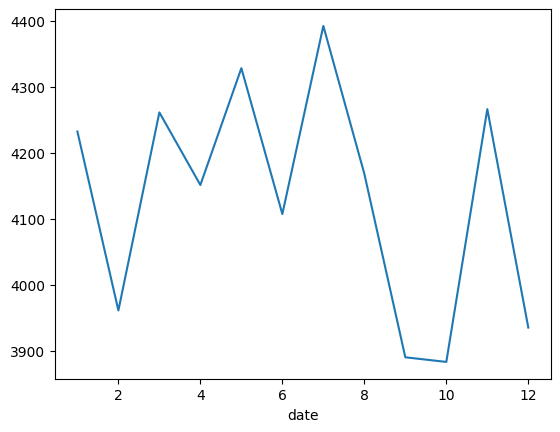

In [108]:
topmonth.plot()

From here we can see that the 7th month which is July is the best selling month, but instead of focusing on it, what about September and October that shown to be two straight month is the lowest selling month which is concerning, we could offer some kind of limited time deals for this two months to increase our sales like for example labor day for september and halloween for october.

#### Description 4

- Weakness<br>
What is our worst selling pizza types and how can we do better sales for it?<br>

We will determine the worst selling pizza based on the number of quantity for each pizza sold with group by the pizzas types.

In [109]:
bottom = newdf.groupby('name')['quantity'].sum()
bottom = bottom.sort_values()
bottom


name
The Brie Carre Pizza                           490
The Mediterranean Pizza                        934
The Calabrese Pizza                            937
The Spinach Supreme Pizza                      950
The Soppressata Pizza                          961
The Spinach Pesto Pizza                        970
The Chicken Pesto Pizza                        973
The Italian Vegetables Pizza                   981
The Chicken Alfredo Pizza                      987
The Green Garden Pizza                         997
The Pepperoni, Mushroom, and Peppers Pizza    1359
The Five Cheese Pizza                         1409
The Greek Pizza                               1420
The Italian Capocollo Pizza                   1438
The Pepper Salami Pizza                       1446
The Spinach and Feta Pizza                    1446
The Prosciutto and Arugula Pizza              1457
The Napolitana Pizza                          1464
The Mexicana Pizza                            1484
The Vegetables + Vegetable

We can see the worst selling pizza more clearly with head and visualize it.

<AxesSubplot: xlabel='name'>

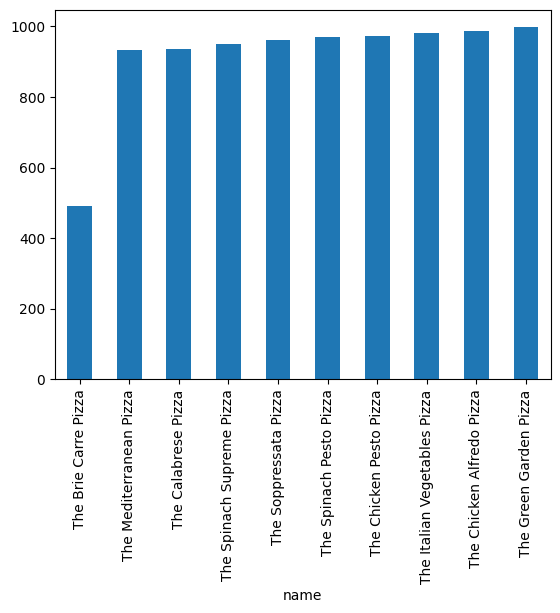

In [110]:
bottom10 = bottom.head(10)
bottom10.plot(kind='bar')

We can clearly see that the worst selling pizza by far is the brie carre pizza which only have almost half of the next worst seller the mediterranean pizza. Maybe its best to drop the brie carre from the menu altogether, but for the rest of the worst seller like the mediterranean and calabrese pizza we could give some price cut for some limited time to increase the sale quantity, for example like doing a rotating monthly pick for the discounted pizza. 

#### Description 5

- Weakness<br>
Would it be better to scratch the worst selling pizza types from the menu?

As we conclude from the previous problem, the brie carre pizza is by far the worst selling pizza and it might be better to remove it from the menu altogether. We could determine wether this will impact the total sales significantly or not by doing a hypothesis testing on it. We will use two sample independent with two tail test from the distribution with the brie carre pizza and a new distribution without the brie carre pizza. The hypothesis that we will use is this:


H0 : μ_withbrie == μ_withoutbrie (with no significant differences)<br>
H1 : μ_withbrie != μ_withoutbrie (with a significant differences)

First, we are going to find the p-value and t-statistics of the two datasets.

In [111]:
wob = newdf[newdf.name != 'The Brie Carre Pizza']

# Menghitung beban harian rata-rata
daily_wb = newdf[['date','GMV']].groupby('date').sum().sample(100)
daily_wob = wob[['date','GMV']].groupby('date').sum().sample(100)

# Menghitung t-stat dan p-value
t_stat, p_val = stats.ttest_ind(daily_wb,daily_wob)
print('P-value:',p_val[0])
print('t-statistics:',t_stat[0])

P-value: 0.3727015824847819
t-statistics: 0.8934487086014258


Because the p-value is larger than the alpha (0.05), we failed to reject the null hypothesis (H0). But to be sure, we will do visualization of the hypothesis testing.

C:\Users\USER\AppData\Local\Temp\ipykernel_8420\1421102253.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(wb_pop, label='With brie carre pizza Average Sales a Day',color='blue')
C:\Users\USER\AppData\Local\Temp\ipykernel_8420\1421102253.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(wo

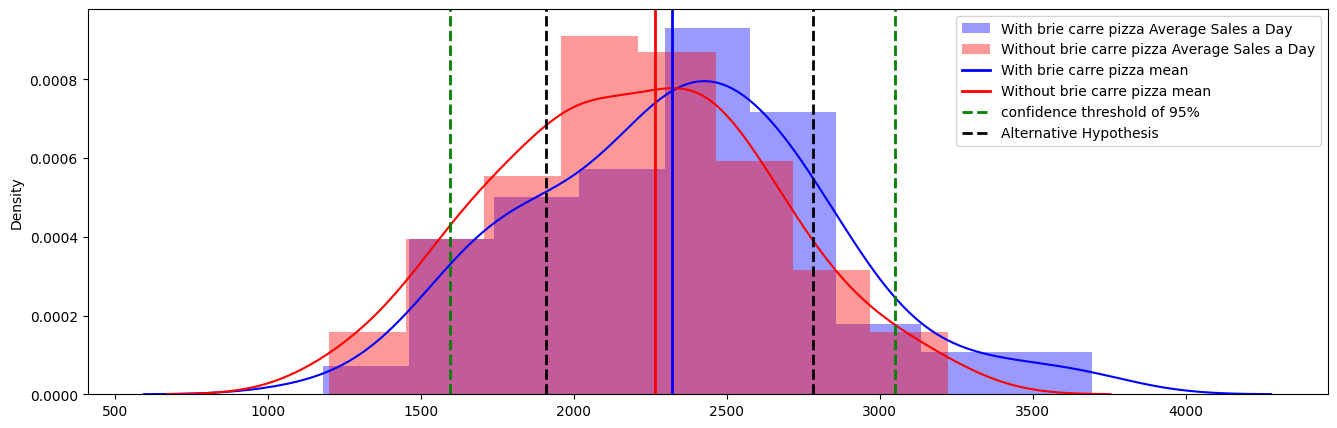

In [112]:
wb_pop = np.random.normal(daily_wb.GMV.mean(),daily_wb.GMV.std(),100)
wob_pop = np.random.normal(daily_wob.GMV.mean(),daily_wob.GMV.std(),100)

ci = stats.norm.interval(0.90, daily_wb.GMV.mean(), daily_wb.GMV.std())
plt.figure(figsize=(16,5))
sns.distplot(wb_pop, label='With brie carre pizza Average Sales a Day',color='blue')
sns.distplot(wob_pop, label='Without brie carre pizza Average Sales a Day',color='red')

plt.axvline(daily_wb.GMV.mean(), color='blue', linewidth=2, label='With brie carre pizza mean')
plt.axvline(daily_wob.GMV.mean(), color='red',  linewidth=2, label='Without brie carre pizza mean')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2)

plt.axvline(wb_pop.mean()+t_stat[0]*wb_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(wb_pop.mean()-t_stat[0]*wb_pop.std(), color='black', linestyle='dashed', linewidth=2)

plt.legend()

We can see that the alternative hypothesis line (h1) is in the confidence interval and therefore we failed to reject the null hypothesis and could conclude that removing the brie carre pizza from the menu won't effect our total sales significantly.

#### Description 6

- Opportunity<br>
If we want to create a new variant of pizza, what kind of pizza would be the best option?

We will determine the new variant by going for the pizza category with most sales.

In [113]:
a = newdf.groupby('category')['quantity'].sum()
a

category
Chicken    11050
Classic    14888
Supreme    11987
Veggie     11649
Name: quantity, dtype: int64

We can see that the best selling pizza category is classic lets see it more clearly by visualizing it.

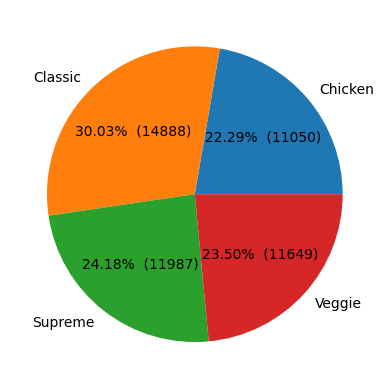

In [114]:
# make the pie circular by setting the aspect ratio to 1
plt.figure(figsize=plt.figaspect(1))

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

plt.pie(a, labels=a.index, autopct=make_autopct(a))
plt.show()

It seems that classic pizza is the category with most sales, but is this really because our customer prefer this category or just because they have more variant than the other categories? To find out we need to find out the number of sales per type of each category, we can do that by doing a two level group by, with category and name.

In [115]:
newvariant = newdf.groupby(['category', 'name']).sum('quantity')
newvariant

order_details_id  \
category name                                                           
Chicken  The Barbecue Chicken Pizza                          56500574   
         The California Chicken Pizza                        56230910   
         The Chicken Alfredo Pizza                           23890746   
         The Chicken Pesto Pizza                             23570840   
         The Southwest Chicken Pizza                         46239737   
         The Thai Chicken Pizza                              57239960   
Classic  The Big Meat Pizza                                  44373219   
         The Classic Deluxe Pizza                            59972116   
         The Greek Pizza                                     34010123   
         The Hawaiian Pizza                                  58434322   
         The Italian Capocollo Pizza                         33999110   
         The Napolitana Pizza                                35312418   
         The Pepperoni Pizza                                 56914939   
         The Pepperoni, Mushroom, and Peppers Pizza          32525973   
Supreme  The Brie Carre Pizza                                11717887   
         The Calabrese Pizza                                 22835268   
         The Italian Supreme Pizza                           44591391   
         The Pepper Salami Pizza                             34843304   
         The Prosciutto and Arugula Pizza                    34615126   
         The Sicilian Pizza                                  46174056   
         The Soppressata Pizza                               23042038   
         The Spicy Italian Pizza                             46117946   
         The Spinach Supreme Pizza                           22475889   
Veggie   The Five Cheese Pizza                               31911486   
         The Four Cheese Pizza                               44805536   
         The Green Garden Pizza                              23532083   
         The Italian Vegetables Pizza                        23022753   
         The Mediterranean Pizza                             23165113   
         The Mexicana Pizza                                  35943548   
         The Spinach Pesto Pizza                             23624208   
         The Spinach and Feta Pizza                          34382522   
         The Vegetables + Vegetables Pizza                   35961369   

                                                     quantity     price  \
category name                                                             
Chicken  The Barbecue Chicken Pizza                      2432  41683.00   
         The California Chicken Pizza                    2370  40166.50   
         The Chicken Alfredo Pizza                        987  16779.00   
         The Chicken Pesto Pizza                          973  16484.75   
         The Southwest Chicken Pizza                     1917  34081.75   
         The Thai Chicken Pizza                          2371  42332.25   
Classic  The Big Meat Pizza                              1914  21732.00   
         The Classic Deluxe Pizza                        2453  37631.50   
         The Greek Pizza                                 1420  28170.10   
         The Hawaiian Pizza                              2422  31561.75   
         The Italian Capocollo Pizza                     1438  24641.50   
         The Napolitana Pizza                            1464  23850.50   
         The Pepperoni Pizza                             2418  29538.25   
         The Pepperoni, Mushroom, and Peppers Pizza      1359  18607.00   
Supreme  The Brie Carre Pizza                             490  11352.00   
         The Calabrese Pizza                              937  15763.75   
         The Italian Supreme Pizza                       1884  32856.25   
         The Pepper Salami Pizza                         1446  25081.00   
         The Prosciutto and Arugula Pizza                1457  23679.7

And then, we will group this to one level group and count the average of the quantity by category.

In [116]:
a = newvariant.groupby('category')['quantity'].mean()
a

category
Chicken    1841.667
Classic    1861.000
Supreme    1331.889
Veggie     1294.333
Name: quantity, dtype: float64

With this we now can be certain that classic pizza is the category with the most sales not because they have more types, so now we will see what types that we already have in this category.

In [117]:
a = newdf[newdf['category'] == 'Classic']
a = a.groupby('name')['quantity'].sum()
a.sort_values(ascending=False)

name
The Classic Deluxe Pizza                      2453
The Hawaiian Pizza                            2422
The Pepperoni Pizza                           2418
The Big Meat Pizza                            1914
The Napolitana Pizza                          1464
The Italian Capocollo Pizza                   1438
The Greek Pizza                               1420
The Pepperoni, Mushroom, and Peppers Pizza    1359
Name: quantity, dtype: int64

There are already 8 different types of classic pizza, but we could add some other classic variants like margherita or marinara to attract wider range of customers.

#### Description 7

- Threat<br>
How well is our daily sales compared against our competitors?

To answer this problem, we need to determine the daily GMV and find the average by using one of the central tendency value which is mean. First we will group the dataset by day and count the sum of the GMV for each day.

In [118]:
daily = newdf.groupby('date')['GMV'].sum()
daily = daily.to_frame()
daily

,GMV
date,
2015-01-01,2713.85
2015-01-02,2731.90
2015-01-03,2662.40
2015-01-04,1755.45
2015-01-05,2065.95
...,...
2015-12-27,1419.00
2015-12-28,1637.20
2015-12-29,1353.25


Now we can count the average of our daily GMV by using .mean.

In [119]:
daily.mean()

GMV    2284.525
dtype: float64

We got our average daily GMV as 2284,525 USD, which is more than the reported daily GMV of our closest competitor that have average GMV around 1900 USD.

## Conclusions, Assumptions, Overall Analysis



### Points from problem  descriptions

1. General<br>
- How does our monthly revenue perform this year? And what will next quarter looks like in the current projection?<br>
This year our monthly revenues are in a downward trend and by forecasting it looks like the next quarter will continue this trend, so some changes needs to be done to change the course of the trend.

2. Strength<br>
- What is our best selling pizza types and how can we maximize the profit from it?<br>
The classic deluxe pizza is the best selling pizza this year and we could maximize profit by improving the sale price by a bit.

- What is our best selling month and how can we maximize the profit from it?<br>
July is our best selling month, but the standout month from the analysis is actually September and October because it is a two straight worst selling month, some action that can improve it may be done by offering some limited time deals for these months.

3. Weakness<br>
- What is our worst selling pizza types and how can we do better sales for it?<br>
The worst selling pizza is by far the brie carre pizza and it might be best to drop it from the menu, for the other worst selling pizza like the mediterranean and calabrese pizza could be given some price cut for a limited time to increase the sale quantity.

- Would it be better to scratch the worst selling pizza types from the menu?<br>
From our hypothesis testing there seems to be no significant difference of our total sales if we drop the brie carre pizza so yes it might be better to drop it altogether.

4. Opportunity<br>
- If we want to create a new variant of pizza, what kind of pizza would be the best option?<br>
The best selling pizza category is the classic pizza so we may want to add some new type for this category such as margherita or marinara pizza.

5. Threat<br>
- How well is our daily sales compared against our competitors? <br>
Our daily GMV average is better than our competitor, but the gap is getting closer.

### Overall Analysis

After all our analysis on the specified points above, we can conclude that to raise our revenue for next quarter by 3% will be a tough but possible task, it could be eased by implementing some if not all of the methods that was mention before, such as improving sale price for the favourite pizza, adding some limited time discount, adding a new variant of pizza or dropping the worst selling pizza from our menu.